In [141]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neural_network import MLPClassifier


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [142]:
# Load the dataset
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [144]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [145]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [146]:
# Separate the target variable from the input features
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [147]:
# Apply min-max scaling to normalize the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [148]:
# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [149]:
# Save the preprocessed and oversampled dataset to a new CSV file
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_resampled.to_csv('./preprocessed_dataset.csv', index=False)

In [150]:
# Load the preprocessed and oversampled dataset
df = pd.read_csv('./preprocessed_dataset.csv')

# Separate the target variable from the input features
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RANDOM FOREST

In [151]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf.predict(X_test)

In [152]:
# Evaluate the performance of the model using metrics
print('-'*20,"RandomForestClassifier",'-'*20)
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1 score:', f1_score(y_test, y_pred_rf),"\n")

-------------------- RandomForestClassifier --------------------
Accuracy: 0.8780487804878049
Precision: 0.8297872340425532
Recall: 0.9512195121951219
F1 score: 0.8863636363636364 



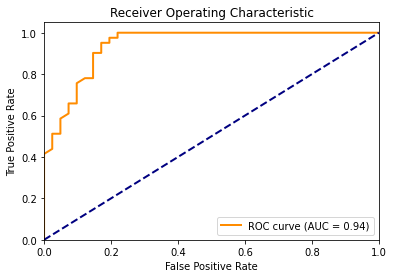

In [153]:
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Decision Tree

In [154]:
# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_dt = dt.predict(X_test)

In [155]:
# Evaluate the performance of the model using metrics
print('-'*20,"DecisionTree",'-'*20)
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Precision:', precision_score(y_test, y_pred_dt))
print('Recall:', recall_score(y_test, y_pred_dt))
print('F1 score:', f1_score(y_test, y_pred_dt))

-------------------- DecisionTree --------------------
Accuracy: 0.8292682926829268
Precision: 0.813953488372093
Recall: 0.8536585365853658
F1 score: 0.8333333333333333


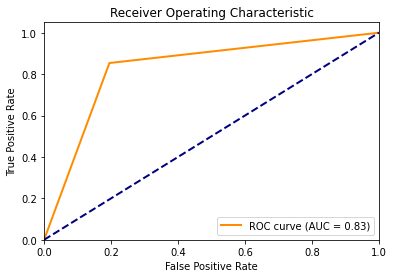

In [156]:
y_prob = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

ADABOOST + DECISION TREE

In [157]:
# Train an AdaBoost model with Decision Tree as the base estimator
dt = DecisionTreeClassifier(max_depth=1, random_state=42)
adaboost = AdaBoostClassifier(dt, n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = adaboost.predict(X_test)

In [158]:
# Evaluate the performance of the model using metrics
print('-'*20,"Adaboost + DecisionTree",'-'*20)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

-------------------- Adaboost + DecisionTree --------------------
Accuracy: 0.8048780487804879
Precision: 0.7777777777777778
Recall: 0.8536585365853658
F1 score: 0.8139534883720929


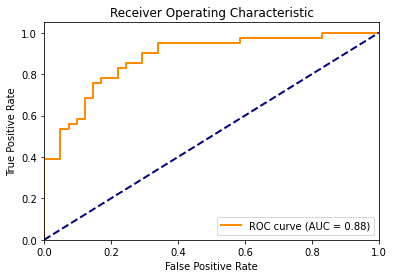

In [159]:
y_prob = adaboost.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

ADABOOST + SVM

In [160]:
# create an SVM base estimator
svm = SVC(kernel='linear', C=0.025, probability = True)

# create an Adaboost classifier with SVM as the base estimator
ada_svm = AdaBoostClassifier(base_estimator=svm, n_estimators=50, learning_rate=1.0, random_state=42)


In [161]:
# train the model
ada_svm.fit(X_train, y_train)

# making prediction
y_pred_adaSVM = ada_svm.predict(X_test)

In [162]:
print('-'*20,"Adaboost + SVM",'-'*20)
print('Accuracy:', accuracy_score(y_test, y_pred_adaSVM))
print('Precision:', precision_score(y_test, y_pred_adaSVM))
print('Recall:', recall_score(y_test, y_pred_adaSVM))
print('F1 score:', f1_score(y_test, y_pred_adaSVM))

-------------------- Adaboost + SVM --------------------
Accuracy: 0.8048780487804879
Precision: 0.8787878787878788
Recall: 0.7073170731707317
F1 score: 0.7837837837837839


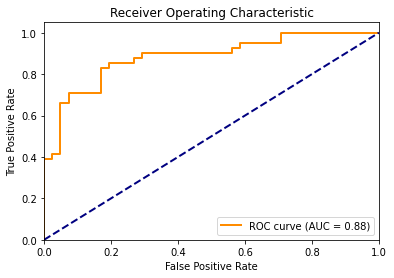

In [163]:
y_prob = ada_svm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

SGDClassifier


In [164]:
# Train an SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l2', random_state=42)
sgd.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_sgd = sgd.predict(X_test)

In [165]:
# Evaluate the performance of the model using metrics
print('-'*20,"SDGClassifier",'-'*20)
print('Accuracy:', accuracy_score(y_test, y_pred_sgd))
print('Precision:', precision_score(y_test, y_pred_sgd))
print('Recall:', recall_score(y_test, y_pred_sgd))
print('F1 score:', f1_score(y_test, y_pred_sgd))

-------------------- SDGClassifier --------------------
Accuracy: 0.7073170731707317
Precision: 0.639344262295082
Recall: 0.9512195121951219
F1 score: 0.7647058823529412


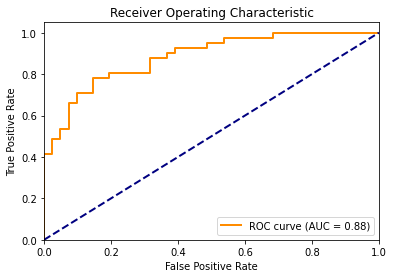

In [166]:
y_prob = sgd.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Gradient Boosting Machine (GBM)

In [167]:
# Train a Gradient Boosting Machine
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.9, random_state=42)
gbm.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gbm = gbm.predict(X_test)

In [168]:
# Evaluate the performance of the model using metrics
print('-'*20,"GradientBoostingMachine",'-'*20)
print('Accuracy:', accuracy_score(y_test, y_pred_gbm))
print('Precision:', precision_score(y_test, y_pred_gbm))
print('Recall:', recall_score(y_test, y_pred_gbm))
print('F1 score:', f1_score(y_test, y_pred_gbm))

-------------------- GradientBoostingMachine --------------------
Accuracy: 0.7926829268292683
Precision: 0.7727272727272727
Recall: 0.8292682926829268
F1 score: 0.7999999999999999


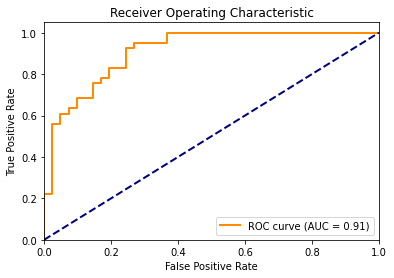

In [169]:
y_prob = gbm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Extra Trees Classifier (ETC)

In [170]:
# Train an Extra Trees Classifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_etc = etc.predict(X_test)

In [171]:
# Evaluate the performance of the model using metrics
print('-'*20,"ExtraTreesClassifier",'-'*20)
print('Accuracy:', accuracy_score(y_test, y_pred_etc))
print('Precision:', precision_score(y_test, y_pred_etc))
print('Recall:', recall_score(y_test, y_pred_etc))
print('F1 score:', f1_score(y_test, y_pred_etc))

-------------------- ExtraTreesClassifier --------------------
Accuracy: 0.8902439024390244
Precision: 0.8478260869565217
Recall: 0.9512195121951219
F1 score: 0.8965517241379309


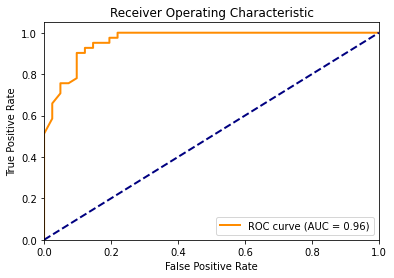

In [172]:
y_prob = etc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Gaussian Naive Bayes (G-NB) 

In [173]:
# Train a Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gnb = gnb.predict(X_test)

In [174]:
# Evaluate the performance of the model using metrics
print('-'*20,"GaussianNaiveBayes",'-'*20)
print('Accuracy:', accuracy_score(y_test,y_pred_gnb))
print('Precision:', precision_score(y_test,y_pred_gnb))
print('Recall:', recall_score(y_test,y_pred_gnb))
print('F1 score:', f1_score(y_test,y_pred_gnb))

-------------------- GaussianNaiveBayes --------------------
Accuracy: 0.7926829268292683
Precision: 0.8333333333333334
Recall: 0.7317073170731707
F1 score: 0.7792207792207793


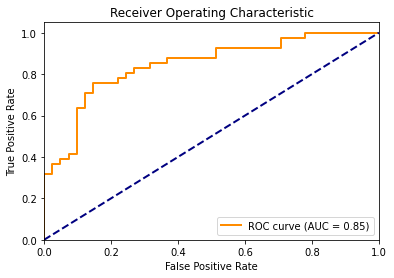

In [175]:
y_prob = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Support Vector Machines

In [176]:
# Train an SVM model
svm = SVC(kernel='poly', C=0.7, random_state=42, probability = True)
svm.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_svm = svm.predict(X_test)

In [177]:
# Evaluate the performance of the model using metrics
print('-'*20,"SupportVectorMachines",'-'*20)
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Precision:', precision_score(y_test, y_pred_svm))
print('Recall:', recall_score(y_test, y_pred_svm))
print('F1 score:', f1_score(y_test, y_pred_svm))

-------------------- SupportVectorMachines --------------------
Accuracy: 0.7804878048780488
Precision: 0.7446808510638298
Recall: 0.8536585365853658
F1 score: 0.7954545454545454


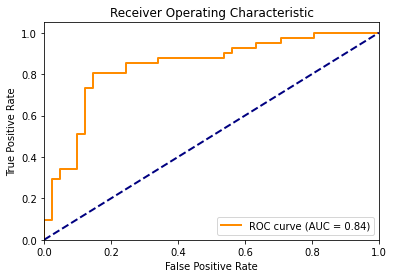

In [178]:
y_prob = svm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

MLP meta classifier


In [179]:

# Create a new dataset with the predictions from the base models
stacked_data = np.column_stack((y_pred_sgd, y_pred_gbm, y_pred_etc, y_pred_gnb, y_pred_svm))

# Train your meta-classifier on the stacked data
meta_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
meta_classifier.fit(stacked_data, y_test)

# Use the base models to make predictions on the testing set
test_pred1 = sgd.predict(X_test)
test_pred2 = gbm.predict(X_test)
test_pred3 = etc.predict(X_test)
test_pred4 = gnb.predict(X_test)
test_pred5 = svm.predict(X_test)

# Create a new dataset with the predictions from the base models
stacked_test_data = np.column_stack((test_pred1, test_pred2, test_pred3, test_pred4, test_pred5))

# Use the meta-classifier to make a prediction on the testing set
ensemble_pred = meta_classifier.predict(stacked_test_data)

# Evaluate the accuracy of the ensemble prediction
accuracy = accuracy_score(y_test, ensemble_pred)
print(f"Ensemble accuracy: {accuracy}")

Ensemble accuracy: 0.8902439024390244


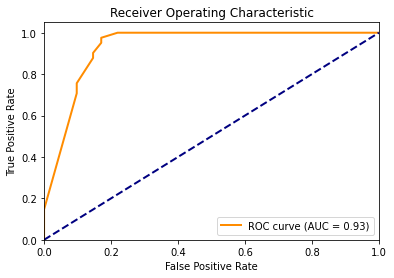

In [180]:
y_prob = meta_classifier.predict_proba(stacked_test_data)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

TESTING STARTS 

In [181]:
# Apply backward elimination to select the most important features
estimator = DecisionTreeClassifier(random_state=42)
selector = RFE(estimator, n_features_to_select=8, step=1)
selector.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=8)

In [182]:
# Print the selected features
selected_features = X_train.columns[selector.support_]
print("Selected features: ", selected_features)

Selected features:  Index(['0', '2', '3', '4', '6', '7', '8', '11'], dtype='object')


In [183]:
# Train a decision tree classifier using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_selected, y_train)

DecisionTreeClassifier(random_state=42)

In [184]:
# Make predictions on the test set and evaluate the model
y_pred_dt_rfe = dt_classifier.predict(X_test_selected)

# Evaluate the performance of the model using metrics
print('Accuracy:', accuracy_score(y_test, y_pred_dt_rfe))
print('Precision:', precision_score(y_test, y_pred_dt_rfe))
print('Recall:', recall_score(y_test, y_pred_dt_rfe))
print('F1 score:', f1_score(y_test, y_pred_dt_rfe))

Accuracy: 0.7804878048780488
Precision: 0.7804878048780488
Recall: 0.7804878048780488
F1 score: 0.7804878048780488


In [185]:
# load data
df2 = pd.read_csv('preprocessed_dataset.csv')

# remove outliers using z-score
df2 = df2[(np.abs(zscore(df2)) < 3).all(axis=1)]

# split data into X and y
y = df2['DEATH_EVENT']
X = df2.drop('DEATH_EVENT', axis=1)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# evaluate model
accuracy = dt.score(X_test, y_test)
print('Accuracy: ', accuracy)

Accuracy:  0.7922077922077922
